In [1]:
import numpy as np
import copy
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import warnings
import os 

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from env import Agent

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Problem
<div>
<img src="images/gridworld_problem.png" width="1000"/>
</div>


The rewards are -1 per move, except if you hit the grey barrier where the reward is -2 and you stay in place. The initial policy is any direction with probability 1/4. 

* Write the model as a Python program and compute the value function for the initial policy, the discount factor $\gamma = 1$
* Find the optimal policy starting at $S$ and getting to $10$.

### Create the Environment and the Agent inside of it

In [3]:
agent = Agent()

### Set the parameters of GridWorld

In [4]:
# 5x5 Grid
agent.set_states(5)
# Set of Rewards for {'MOVE','WALL','BLOCKED GRID','TERMINAL'}
agent.set_rewards((-1,-1,-2,10))
# Set Discount Factor
agent.set_discount(1)
# Set Starting Point in the Grid 
agent.set_starting_grid((2,4))
# Set Terminal Point in the Grid 
agent.set_terminal_grid((0,4))
# Set Blocked States in the Grid
for state in [(1,2),(1,3),(1,4),(2,1),(2,2),(3,2)]:
    agent.set_blocked_grid(state)
# Initialize the value and policy for each states
agent.init_v_and_policy()

### Compute the Value for each State for the Initial Policy

In [5]:
# The input is a parameter to stop iterating when the sum of the value functions stop changing
agent.compute_value_policy(1e-4)

Saving figure initial_value_policy


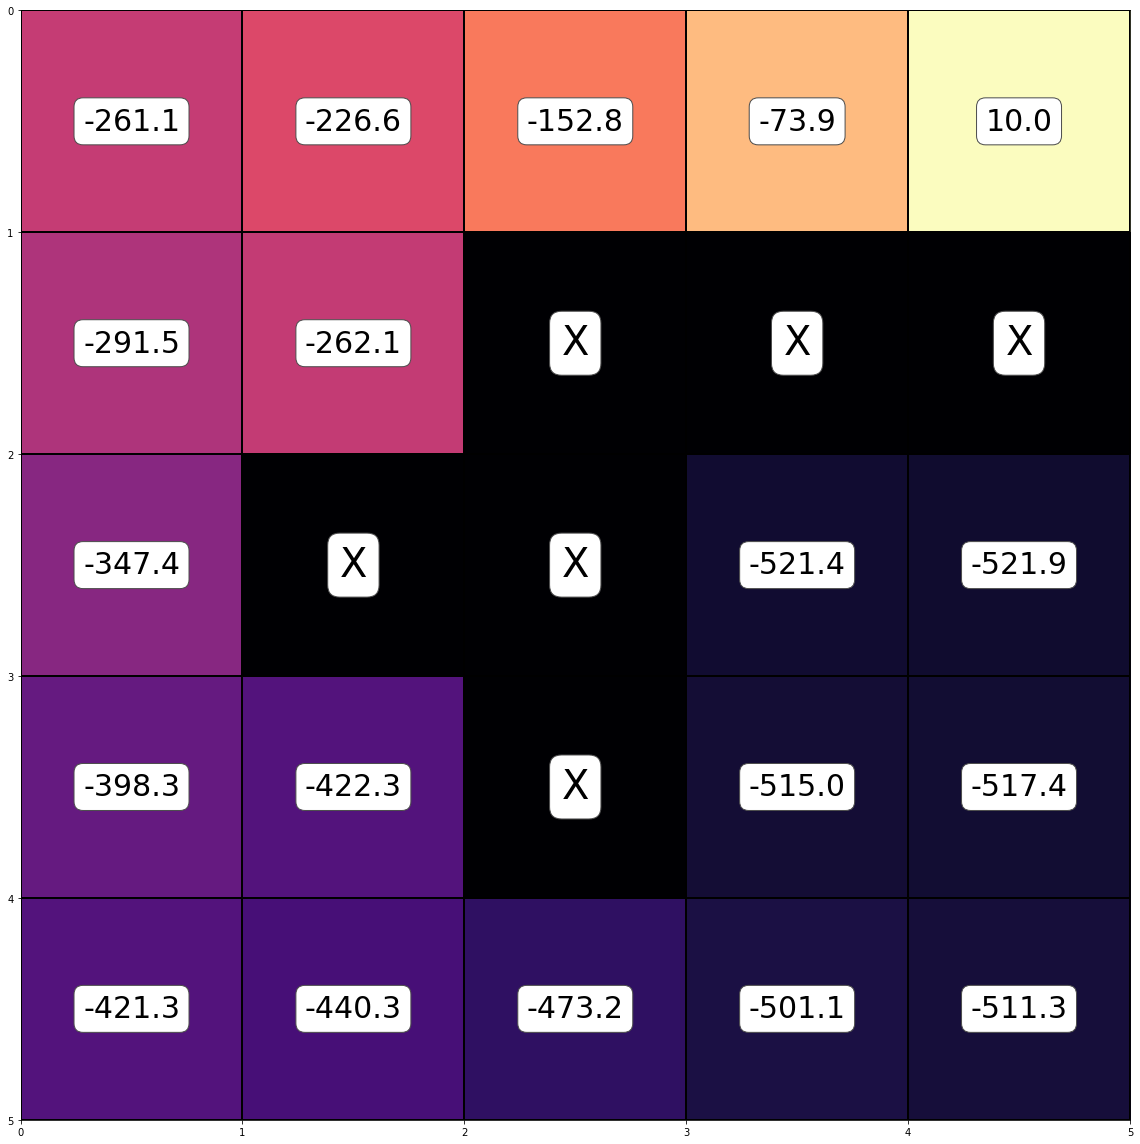

In [6]:
agent.plot_value_function()
save_fig("initial_value_policy")

### Compute the Optimized Value Policy

In [7]:
# The input is a parameter to stop iterating when the sum of the value functions stop changing
agent.compute_optimized_policy(1e-6)

Saving figure optimized_value_policy


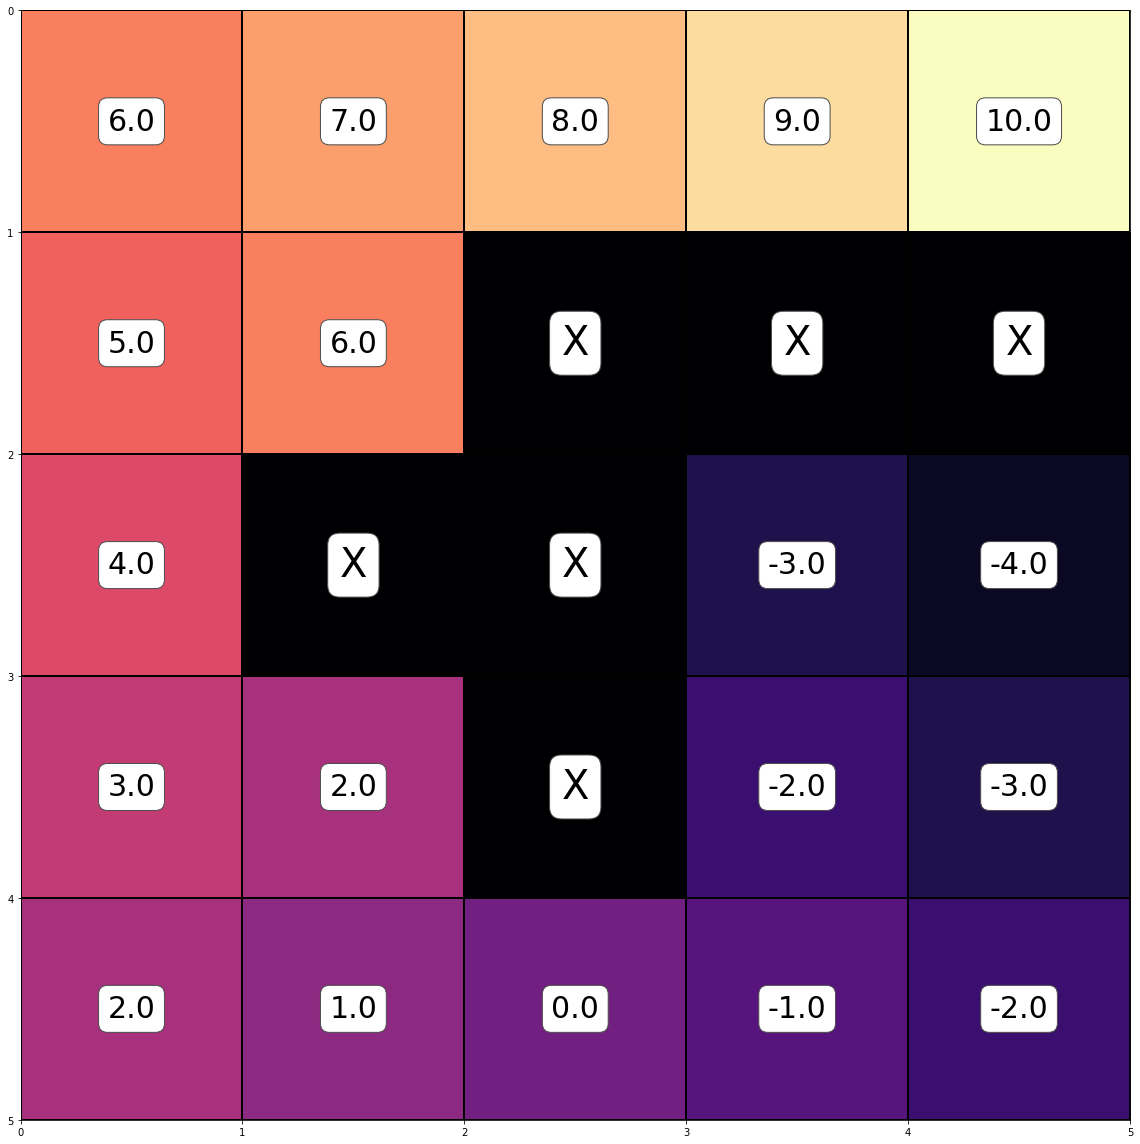

In [8]:
agent.plot_value_function()
save_fig("optimized_value_policy")

Saving figure optimized_direction


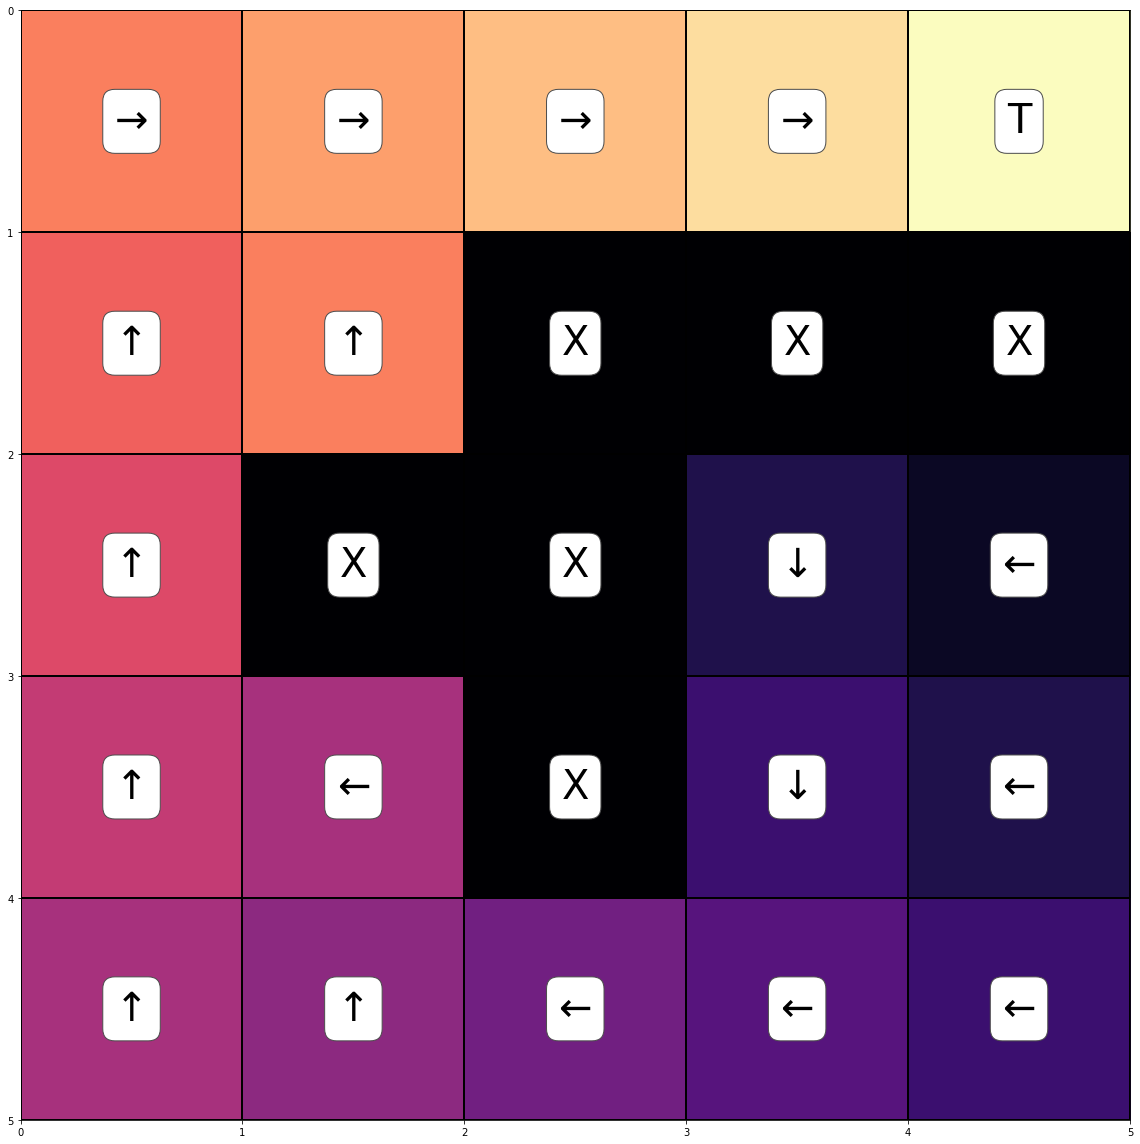

In [9]:
agent.plot_optimized_policy()
save_fig("optimized_direction")

### Optimal Policy starting at Starting point

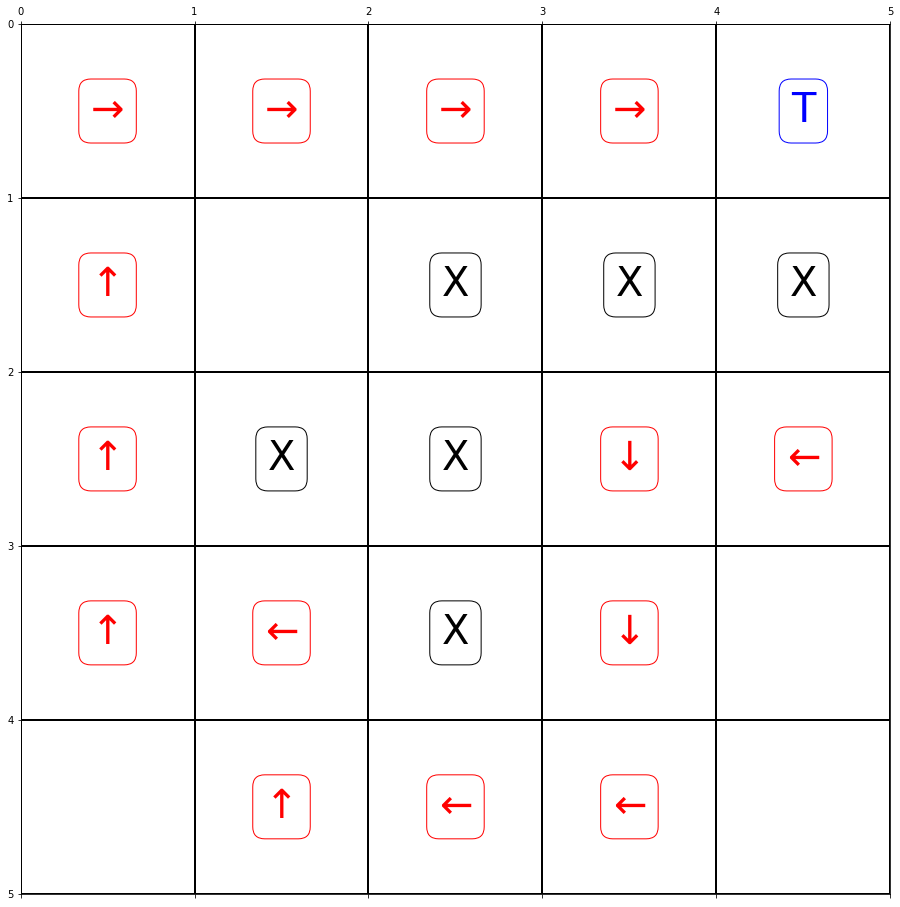

Saving figure optimized_path


<Figure size 432x288 with 0 Axes>

In [10]:
agent.plot_optimaL_set_directions()
save_fig("optimized_path")

In [11]:
agent.print_optimaL_set_directions()

['←', '↓', '↓', '←', '←', '↑', '←', '↑', '↑', '↑', '→', '→', '→', '→']
